In [2]:
import pandas as pd
from sklearn.datasets import load_digits

In [3]:
dataset=load_digits()

In [6]:
dir(dataset)

['DESCR', 'data', 'images', 'target', 'target_names']

In [7]:
dataset['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
dataset['target']

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
dataset['data'].shape

(1797, 64)

In [14]:
dataset['target'].shape

(1797,)

In [15]:
dataset['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

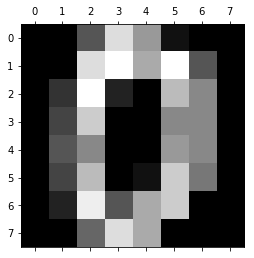

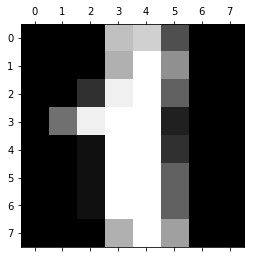

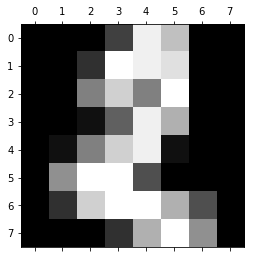

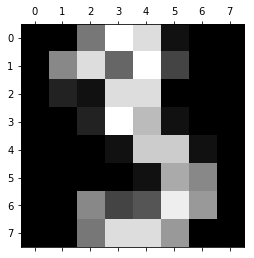

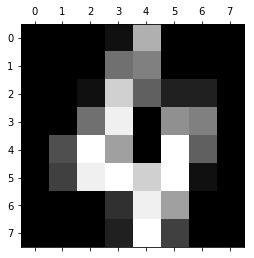

In [19]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.gray()
    #print(dataset['images'][i])
    plt.matshow(dataset['images'][i])

In [21]:
df=pd.DataFrame(dataset.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [23]:
df['target']=dataset.target

In [24]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [26]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rcf=RandomForestClassifier()

In [29]:
rcf.fit(X_train, y_train)

c:\users\santosh\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
rcf.score(X_test, y_test)

0.9388888888888889

In [31]:
y_pred=rcf.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test, y_pred)
cm

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 45,  2,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  1, 61,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 49,  1,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 48,  0,  0],
       [ 0,  3,  1,  0,  1,  2,  0,  1, 44,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  3,  2, 42]], dtype=int64)

Text(33.0, 0.5, 'Atual Values')

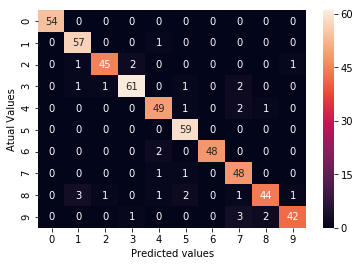

In [38]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Atual Values')

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.92      0.98      0.95        58
           2       0.96      0.92      0.94        49
           3       0.95      0.92      0.94        66
           4       0.91      0.92      0.92        53
           5       0.92      1.00      0.96        59
           6       1.00      0.96      0.98        50
           7       0.86      0.96      0.91        50
           8       0.94      0.83      0.88        53
           9       0.95      0.88      0.91        48

   micro avg       0.94      0.94      0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540

